In [1]:
import numpy as np
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def write_numpy_matrix_to_file(matrix, outfile):
    """Write a square matrix to a file."""
    N = matrix.shape[0]
    with open(outfile, 'w') as f:
        f.write(str(N))
        f.write('\n')
        for i in range(N):
            for j in range(N):
                f.write(str(matrix[i, j]))
                f.write(',')
            f.write('\n')
        f.write('\n')

def parse_results(output, niters):
    N, time, eigen_val, *eigen_vec = list(map(float, output.decode().split('\n')[:-1]))
    return {
        'N': N,
        'time': time,
        'niters': niters,
        'eigen_val': eigen_val,
        'eigen_vec': np.array(eigen_vec),
    }

def run(exc_path, matrix_file, niters):
    args = (exc_path, matrix_file, str(niters))
    proc = subprocess.Popen(args, stdout=subprocess.PIPE)
    proc.wait()
    output = proc.stdout.read()
    return parse_results(output, niters)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[1342.065437752, 2.538211220000001, 0.19327308399999765, 0.015818834000000948, 0.001350035000001526, 0.00025934399999982816, 0.00020487799999813205, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662, 0.00021436900000537662]


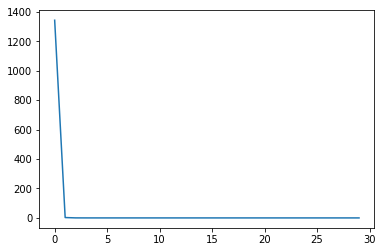

In [3]:
# Una prueba simple
OUT_FILE = '../data/matrix.csv'
EXEC_PATH = '../executables/power_method'

def generate_sample_of_size(size=(30, 30)):
    m = np.random.randint(low=0, high=2, size=size)
    # m = np.array([[0,1,2], [3, 4, 5], [6, 7, 8]])
    # By multipling we are making it symetric
    # return m
    return m.T.dot(m)

def error(M, out_dict):
    Mv = M.dot(out_dict['eigen_vec'])
    lv = out_dict['eigen_val'] * out_dict['eigen_vec']
    return np.linalg.norm(np.abs(Mv - lv), ord=np.inf)

n_iter_range = list(range(30))
n_samples = 30
size = (30, 30)
results = []

M = generate_sample_of_size(size)
write_numpy_matrix_to_file(M, OUT_FILE)
for n_iter in n_iter_range:
    out = run(EXEC_PATH, OUT_FILE, n_iter)
    err = error(M, out)
    out['error'] = err
    results.append(out)

# Plot results
x = [o['niters'] for o in results]
err = [o['error'] for o in results]
print(x)
print(err)
plt.plot(x, err)

In [4]:
# Pareceria se que esta convergiendo bastante rapido

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[1.21005552e+05 1.00330886e+01 9.09207438e-02 3.06495720e-03
 2.60035520e-03 2.59996740e-03 2.59996740e-03 2.59996740e-03
 2.59996740e-03 2.59996740e-03 2.59996740e-03 2.59996740e-03
 2.59996740e-03 2.59996740e-03 2.59996740e-03 2.59996740e-03
 2.59996740e-03 2.59996740e-03 2.59996740e-03 2.59996740e-03
 2.59996740e-03 2.59996740e-03 2.59996740e-03 2.59996740e-03
 2.59996740e-03 2.59996740e-03 2.59996740e-03 2.59996740e-03
 2.59996740e-03 2.59996740e-03 2.59996740e-03 2.59996740e-03
 2.59996740e-03 2.59996740e-03 2.59996740e-03]


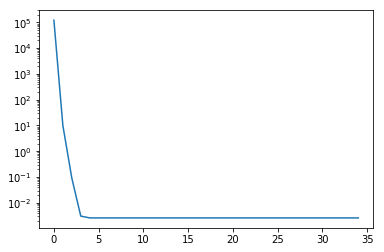

In [8]:
n_iter_range = list(range(35))
n_samples = 100
size = (300, 300)

results = np.zeros(shape=(n_samples, len(n_iter_range)))
for i in range(n_samples):
    res_i = []
    M = generate_sample_of_size(size)
    write_numpy_matrix_to_file(M, OUT_FILE)
    for n_iter in n_iter_range:
        out = run(EXEC_PATH, OUT_FILE, n_iter)
        err = error(M, out)
        res_i.append(err)
    results[i,:] = res_i

# Plot results
x = n_iter_range
err = np.mean(results, axis=0)
print(x)
print(err)
plt.plot(x, err)
plt.yscale('log')